In [1]:
!pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 KB 7.0 MB/s eta 0:00:00


In [2]:
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from deap import base, creator, tools, algorithms

In [46]:

iris_df = pd.read_csv('/content/heart_numeric_data.csv')
for col in iris_df.columns:
    iris_df[col].fillna(iris_df[col].mean(), inplace=True)
X = iris_df.iloc[:, :-1].values
y = iris_df.iloc[:, -1].values
print(iris_df.head())


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



   id  age  sex  cp  trestbps   chol  fbs  restecg  thalch  exang  oldpeak  \
0   1   63    1   3     145.0  233.0  1.0      2.0   150.0    0.0      2.3   
1   2   67    1   0     160.0  286.0  0.0      2.0   108.0    1.0      1.5   
2   3   67    1   0     120.0  229.0  0.0      2.0   129.0    1.0      2.6   
3   4   37    1   2     130.0  250.0  0.0      1.0   187.0    0.0      3.5   
4   5   41    0   1     130.0  204.0  0.0      2.0   172.0    0.0      1.4   

   slope   ca  thal  num  
0    0.0  0.0   0.0    0  
1    1.0  3.0   1.0    2  
2    1.0  2.0   2.0    1  
3    0.0  0.0   1.0    0  
4    2.0  0.0   1.0    0  


In [44]:
# Define the DEAP fitness function
def evaluate(individual):
    print("this is the individual = ",individual)
    # Select the features based on the individual's chromosome
    selected_features = [i for i, bit in enumerate(individual) if bit]
    print('selected in the fintness = ', selected_features)
    if any(selected_features):
      X_train_selected = X_train[:, selected_features]
      X_test_selected = X_test[:, selected_features]
      if X_train_selected.shape[1]==0:
        return 0
      else:
        # Train a random forest classifier on the selected features
        clf = RandomForestClassifier(n_estimators=100, random_state=42)
        clf.fit(X_train_selected, y_train)

        # Evaluate the classifier's accuracy on the testing set
        y_pred = clf.predict(X_test_selected)
        accuracy = accuracy_score(y_test, y_pred)

        # Return the accuracy as the fitness value
        print('this is the accuracy --> ', accuracy)
        return accuracy,
    else :
        return 0


In [60]:

# Define the DEAP toolbox
random.seed(1)
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)
toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(iris_df.columns)-1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)



/usr/local/lib/python3.9/dist-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.9/dist-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [61]:
# Set the genetic algorithm parameters
np.random.seed(1)
POP_SIZE = 10
NUM_GENERATIONS = 20
CROSSOVER_PROBABILITY = 0.5
MUTATION_PROBABILITY = 0.01

# Initialize the population
population = toolbox.population(n=POP_SIZE)
i=1
# Run the genetic algorithm
for gen in range(NUM_GENERATIONS):
    offspring = algorithms.varAnd(population, toolbox, CROSSOVER_PROBABILITY, MUTATION_PROBABILITY)
    print('this is the offspring = ',offspring)
    print('this is the shape = ',type(offspring))
    print("itter = ", i)
    fits = toolbox.map(toolbox.evaluate, offspring)
    print('fits = ',fits)
    for ind, fit in zip(offspring, fits):
        print('zip executed')
        if(fit):
          ind.fitness.values = fit
          print('reaching next to assign',ind.fitness.values)
    population = toolbox.select(offspring, k=len(population))
    print('population generated')
    i=i+1

# Get the best individual and its fitness value
best_individual = tools.selBest(population, k=1)[0]
best_fitness = evaluate(best_individual)[0]

# Print the results
print("Best individual:", best_individual)
print("Best fitness:", best_fitness)

this is the offspring =  [[0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1], [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0], [0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1], [0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0], [1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1], [0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0], [0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1], [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0], [1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1], [1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1]]
this is the shape =  <class 'list'>
itter =  1
fits =  <map object at 0x7ff52ed47bb0>
this is the individual =  [0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1]
selected in the fintness =  [2, 4, 5, 6, 7, 10, 12, 13]
this is the accuracy -->  0.483695652173913
zip executed
reaching next to assign (0.483695652173913,)
this is the individual =  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0]
selected in the fintness =  [1, 2, 5, 10, 12]
this is the accuracy -->  0.5271739130434783
zip executed
reaching next to assign (0.5271739130434783,)
th

In [62]:
# Set the genetic algorithm parameters
np.random.seed(1)
POP_SIZE = 10
NUM_GENERATIONS = 20
CROSSOVER_PROBABILITY = 0.5
MUTATION_PROBABILITY = 0.01

# Initialize the population
population = toolbox.population(n=POP_SIZE)

# Create an empty list to store the best individual of each generation
best_individuals = []

# Run the genetic algorithm
for gen in range(NUM_GENERATIONS):
    offspring = algorithms.varAnd(population, toolbox, CROSSOVER_PROBABILITY, MUTATION_PROBABILITY)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for ind, fit in zip(offspring, fits):
        if fit:
            ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))
    
    # Get the best individual and its fitness value of the current generation
    best_individual = tools.selBest(population, k=1)[0]
    best_fitness = evaluate(best_individual)[0]
    
    # Append the best individual of the current generation to the list
    best_individuals.append(best_fitness)
print('best fit list ',best_fitness)
# Print the best individual of each generation
for i, best_individual in enumerate(best_individuals):
    print("Best individual of generation", i+1, ":", best_individual)

this is the individual =  [0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0]
selected in the fintness =  [1, 2, 3, 4, 7, 8, 11]
this is the accuracy -->  0.5163043478260869
this is the individual =  [1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1]
selected in the fintness =  [0, 4, 5, 7, 9, 13]
this is the accuracy -->  0.5869565217391305
this is the individual =  [1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1]
selected in the fintness =  [0, 1, 2, 4, 10, 11, 13]
this is the accuracy -->  0.5706521739130435
this is the individual =  [1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0]
selected in the fintness =  [0, 3, 4, 6, 8, 11, 12]
this is the accuracy -->  0.5869565217391305
this is the individual =  [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0]
selected in the fintness =  [0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12]
this is the accuracy -->  0.6086956521739131
this is the individual =  [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0]
selected in the fintness =  [5, 7, 10, 11, 12]
this is the accuracy -->  0.47282608695652173


this is the individual =  [1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1]
selected in the fintness =  [0, 1, 2, 4, 5, 6, 7, 9, 11, 12, 13]
this is the accuracy -->  0.6413043478260869
this is the individual =  [1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1]
selected in the fintness =  [0, 1, 2, 4, 5, 6, 7, 9, 11, 12, 13]
this is the accuracy -->  0.6413043478260869
this is the individual =  [1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1]
selected in the fintness =  [0, 1, 2, 4, 5, 6, 7, 9, 11, 12, 13]
this is the accuracy -->  0.6413043478260869
this is the individual =  [1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1]
selected in the fintness =  [0, 1, 2, 4, 5, 6, 7, 9, 11, 12, 13]
this is the accuracy -->  0.6413043478260869
this is the individual =  [1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1]
selected in the fintness =  [0, 1, 2, 4, 5, 6, 7, 9, 11, 12, 13]
this is the accuracy -->  0.6413043478260869
this is the individual =  [1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1]
selected in the fintness =  [0, 1, 2

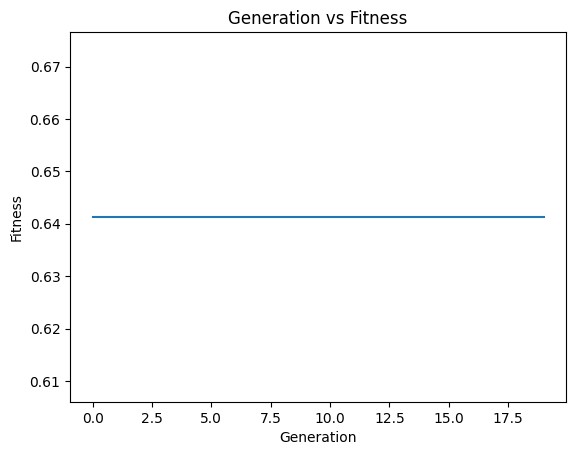

In [63]:
import matplotlib.pyplot as plt

fitness_values = []
for gen in range(NUM_GENERATIONS):
    offspring = algorithms.varAnd(population, toolbox, CROSSOVER_PROBABILITY, MUTATION_PROBABILITY)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for ind, fit in zip(offspring, fits):
        if fit:
            ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))
    best_individual = tools.selBest(population, k=1)[0]
    best_fitness = evaluate(best_individual)[0]
    fitness_values.append(best_fitness)
print(fitness_values)
plt.plot(list(range(NUM_GENERATIONS)), fitness_values)
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Generation vs Fitness')
plt.show()

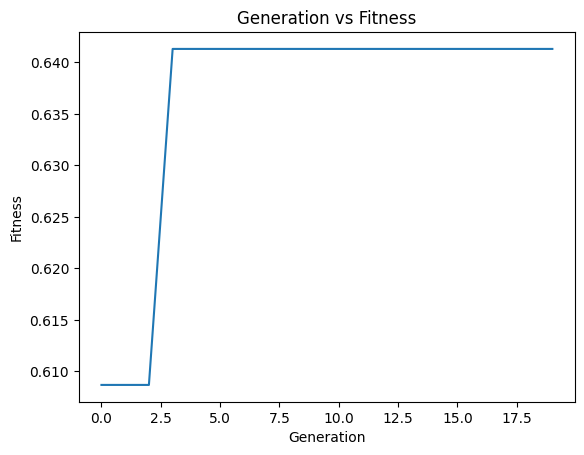

0.6413043478260869


In [64]:
plt.plot(best_individuals)
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Generation vs Fitness')
plt.show()
print(fitness_values[0])

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

def evaluate(individual):
    # Select the features using SelectKBest with mutual information scoring
    n_features = sum(individual)
    selector = SelectKBest(mutual_info_classif, k=n_features)
    X_reduced = selector.fit_transform(X, y)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

    # Train and evaluate the classifier on the reduced feature set
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Return a tuple of the accuracy and number of selected features
    return accuracy,